In [1]:
# these instructions are based in part from https://github.com/Becksteinlab/
#    making-prettier-plots/blob/master/Making%20better%20plots.ipynb

# import the scientific numeric library and abbreviate it as np
import numpy as np

# import datatime and abbreviate it as dt
from datetime import datetime as dt

# import the pythonic pyplot interface and abbreviate it as plt
import matplotlib.pyplot as plt

# necessary for the notebook to render the plots inline
%matplotlib inline

# import seaborn's helpful functions without applying its style
import seaborn.apionly as sns

# importing seaborn can sometimes reset matplotlib's style to default
plt.style.use('ggplot')

# this will remove the noisy grids the 'ggplot' style gives
sns.set_style('ticks')

In [2]:
# read in the air quality data
# setup a fuction to handle dates in standardized format
convertfunc = lambda x: dt.strptime(x,'"%Y-%m-%d %H:%M"')

# read from csv files
# row 0 has the column names, column 0 has the dates, column 1 has the air data
# AQS site 2 ozone
data_a0 = np.genfromtxt('AQS2_O3.csv', usecols=(0), delimiter=',', names=True,
                        converters={'DATE': convertfunc})
data_a1 = np.genfromtxt('AQS2_O3.csv', usecols=(1), delimiter=',', names=True)

# AQS site 2 sufur dioxide
data_b0 = np.genfromtxt('AQS2_SO2.csv', usecols=(0), delimiter=',', names=True,
                        converters={'DATE': convertfunc})
data_b1 = np.genfromtxt('AQS2_SO2.csv', usecols=(1), delimiter=',', names=True)

# AQS site 3 ozone
data_c0 = np.genfromtxt('AQS3_o3.csv', usecols=(0), delimiter=',', names=True,
                        converters={'DATE': convertfunc})
data_c1 = np.genfromtxt('AQS3_o3.csv', usecols=(1), delimiter=',', names=True)

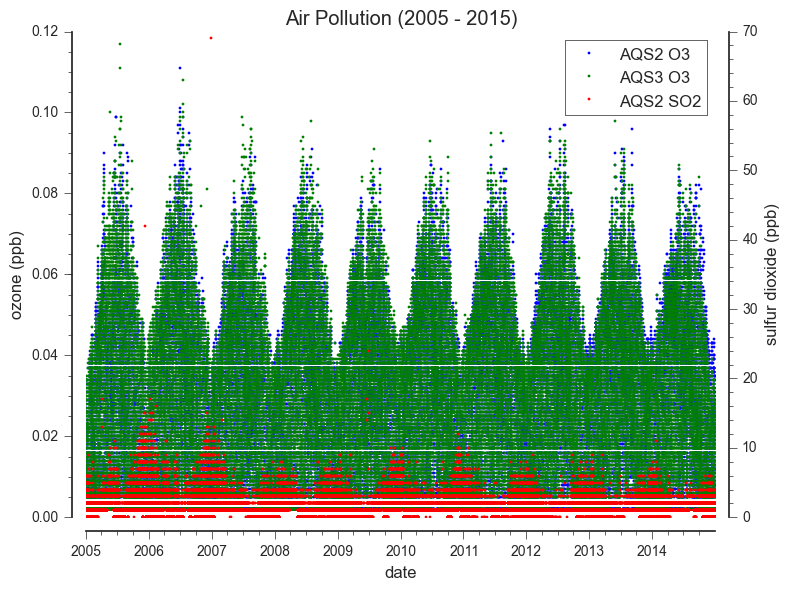

In [3]:
# plot the figue
# set up the figure size to be 10 inches x 4 inches
fig = plt.figure(figsize=(10,4))

# establish there will be one plot in fig with shared x axis
fig, axes0 = plt.subplots(1,1,sharex=True,sharey=False)

# plot the datasets which will use the primary y-axis
# save them as an objects for legend purposes
# suggest to Python that this is a plot containing a date axis
# use plot_date(x, y, Expressions)
# line style ls is 'None' since this is a scatter plot
# marker size ms is 2 points
# marker edge width mew is 0 so that the points don't have border lines
# the marker colors are set as blue 'b', green 'g', red 'r'
# the labels of the dataset is established for legend purposes
legend0 = axes0.plot_date(data_a0, data_a1, ls='None', ms=2, mew=0, color='b', label="AQS2 O3")
legend2 = axes0.plot_date(data_c0, data_c1, ls='None', ms=2, mew=0, color='g', label="AQS3 O3")

# establish that axes1 will share the x-axis of axes0
axes1 = axes0.twinx()

# plot the dataset which will use the secondary y-axis of axes1
legend1 = axes1.plot_date(data_b0, data_b1, ls='None', ms=2, mew=0, color='r', label="AQS2 SO2")

# combine plot objects to make a single legend
legend_al1 = legend0 + legend2 + legend1

# extract the all labels of the legend objects
labels_al1 = [l.get_label() for l in legend_al1]

# make a simple single legend with a legend border
plt.legend(legend_al1, labels_al1, frameon=True)

# offset selected axes; do not show the others
for loc, spine in axes0.spines.items():
    # offset outward by 10 points the left side primary y-axis in axes0
    if loc in 'left':
        spine.set_position(('outward', 10))
        spine.set_smart_bounds(True)
    
    # offset outward by 10 points the bottom x-axis in axes0
    elif loc in 'bottom':
        spine.set_position(('outward', 10))
        spine.set_smart_bounds(True)
        axes0.xaxis.tick_bottom()
    
    # do not show the top x-axis spine and the right y-axis spine in axes0
    else:
        spine.set_color('none')

for loc, spine in axes1.spines.items():
    # offset outward by 10 points the right side secondary y-axis 
    if loc in 'right':
        spine.set_position(('outward', 10))
        spine.set_smart_bounds(True)
    
    # do not show any other axis spines in axes1
    else:
        spine.set_color('none')

# add finishing touches to figure
# enable the minor tick marks on the primary axes0
axes0.axes.minorticks_on()

# create the primary y-axis label
axes0.set_ylabel('ozone (ppb)')

# create the x-axis label
axes0.set_xlabel('date')

# create the chart title
axes0.set_title('Air Pollution (2005 - 2015)')

# enable the minor tick marks on the secondary axes1
axes1.axes.minorticks_on()

# create the secondary y-axis label
axes1.set_ylabel('sulfur dioxide (ppb)')

# adjust the layout so all labels fit nicely
plt.tight_layout()

# show the figure
plt.show(fig)

# save the plot to .pdf and .png files
fig.savefig('AirPollution1.pdf')
fig.savefig('AirPollution1.png', dpi=300)